In [1]:
from requests_oauthlib import OAuth1Session, OAuth1
import json
import requests
import urllib
import sys
import io

#検索文字列設定
word = '2020'
# デフォルト文字コードをutf8に変更
#sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

#apiキー情報設定
consumer_key  = ''
consumer_key_secret  = ''
access_token  = ''
access_token_secret  = ''

#twitterAPIアクセス
url = "https://api.twitter.com/1.1/search/tweets.json?count=100&lang=ja&q=" + word
auth = OAuth1(consumer_key, consumer_key_secret, access_token, access_token_secret)
response = requests.get(url, auth = auth)
data = response.json()['statuses']

#データ表示
tweets_at = []
tweets_text = []
cnt = 0
while True:
    for tweet in data:
        if cnt <10000:
            tw_at = tweet["created_at"]
            tw_text = tweet["text"]#ツイート内容
            cnt += 1
            maxid = int(tweet["id"]) - 1
            tweets_at.append(tw_at)
            tweets_text.append(tw_text)
        if cnt >= 10000:
            break
        
    #ツイートがない場合ループ終了
    if len(data) == 0:
        break

    url = "https://api.twitter.com/1.1/search/tweets.json?count=100&lang=ja&q=" + word + "&max_id=" + str(maxid)
    auth = OAuth1(consumer_key, consumer_key_secret, access_token, access_token_secret)
    response = requests.get(url, auth = auth)
    data = response.json()['statuses']

print("ツイート数:" + str(cnt))

KeyError: 'statuses'

In [8]:
import pandas as pd
dict = {'text':tweets_text} 
df = pd.DataFrame(dict) 
df.to_csv('2020_list.csv',index=False)

In [9]:
!pip install janome
from janome.tokenizer import Tokenizer
import pandas as pd
import re

#list.csvファイルを読み込み
df_file = pd.read_csv('prepre2020list.csv', encoding='utf-8')

tweet_words = df_file['text'].tolist()

t = Tokenizer()

results = []

for w in tweet_words:
    tokens = t.tokenize(w)

    r = []

    for tok in tokens:
        if tok.base_form == '*':
            word = tok.surface
        else:
            word = tok.base_form

        ps = tok.part_of_speech

        hinshi = ps.split(',')[0]

        if hinshi in ['名詞', '形容詞', '動詞', '副詞']:
            r.append(word)

    rl = (' '.join(r)).strip()
    results.append(rl)
    #余計な文字コードの置き換え
    result = [i.replace('\u3000','') for i in results]

text_file = '2020_list.txt'
with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(result))

In [10]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


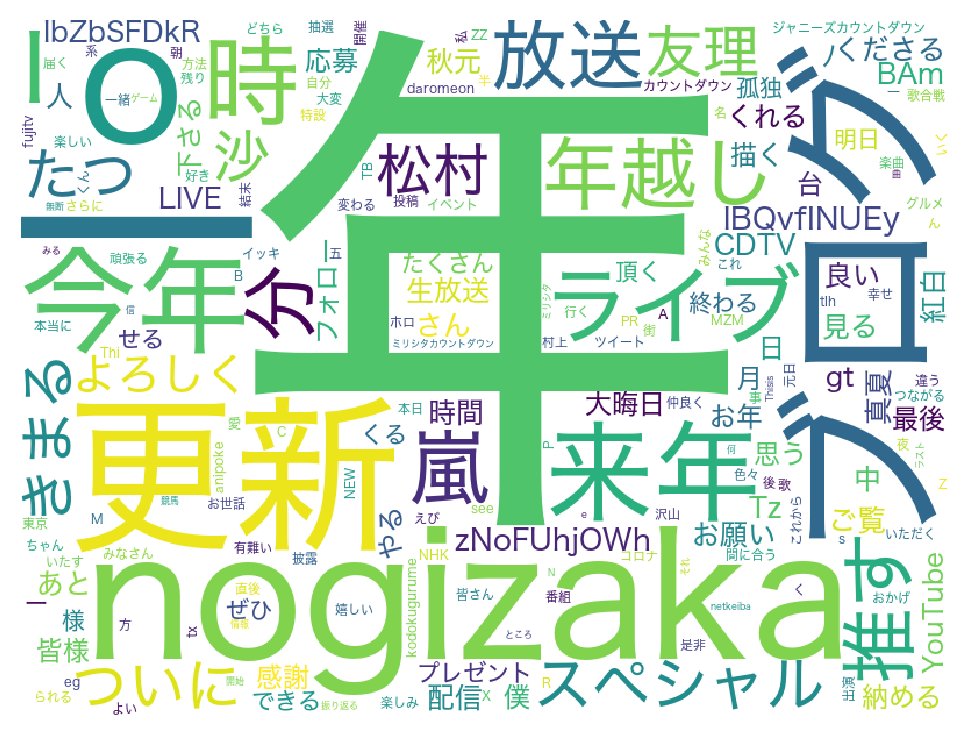

In [14]:
from wordcloud import WordCloud
from os import path
import matplotlib.pyplot as plt

text_file = open('2020_list.txt', encoding='utf-8')
text = text_file.read()

from PIL import Image, ImageDraw, ImageFont

#日本語のフォントパス
font = './Users/sakikawamura/Library/Fonts/ヒラギノ角ゴシック W4.ttc'

#無意味そうな単語除去
stop_words = ['そう', 'ない', 'いる', 'する', 'まま', 'よう', 'てる', 'なる', 'こと', 'もう', 'いい', 'ある', 'ゆく', 'れる','の','http','co','RT','https','t']

wordcloud = WordCloud(background_color='white', max_words=200, font_path=font, width=800, height=600, collocations=False, stopwords=set(stop_words)).generate(text)

#画像はwordcloud.pyファイルと同じディレクトリにpng保存
wordcloud.to_file('./wordcloud_p.png')

plt.figure(figsize=(6,6), dpi=200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
from PIL import Image
import numpy as np

# マスクを作成する
mask_array = np.array(Image.open('2020.png'))

# ワードクラウドを作成する
wc = WordCloud(mask=mask_array, background_color='white', colormap='gist_heat', max_words=200, font_path="./Users/sakikawamura/Library/Fonts/ヒラギノ角ゴシック W4.ttc", width=1000, height=1000, collocations=False, stopwords=set(stop_words), contour_width=10,contour_color='red').generate(text)

# そのままファイルに保存する場合はto_fileメソッドで
wc.to_file('2020_mask.png')

# PILで表示する
image_array = wc.to_array()
img = Image.fromarray(image_array)
img.show()